In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from clustering.kmesar import KMESAR
from clustering.utils import load_dataset_3_clusters_separate

In [2]:
points = load_dataset_3_clusters_separate()
init_centroids = np.array([
    [-0.1, 3], [0.4, 2], [-0.6, 0]
])
df = pd.DataFrame(points, columns=['x', 'y'])

print(df.head())

          x         y
0 -1.423692  0.279919
1 -1.061591  0.223465
2 -0.522010  0.038496
3 -0.998880 -0.427949
4 -1.231561 -0.000117


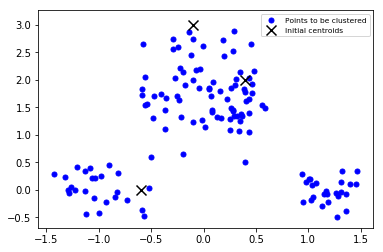

In [3]:
plt.scatter(points[:, 0], points[:, 1], c='blue', s=25, label='Points to be clustered')
plt.scatter(init_centroids[:, 0], init_centroids[:, 1], c='black', s=100, marker='x', label='Initial centroids')
plt.legend(loc='upper right', prop={'size': 7.5})


Text(0.5, 1.0, 'K-Means standard: k_clusters=3, n_init=1, n_iter=4, SSE= 80.5')

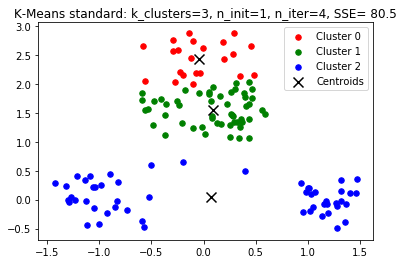

In [4]:
est = KMESAR(k_clusters=3, init_centroids=init_centroids, n_init=1, simulated_annealing_on=False)
est.fit(points)
df['label'] = est.labels_

colors = ['red', 'green', 'blue']
for cluster_label in range(est.k_clusters):
    cluster_subsample = df.loc[df['label'] == cluster_label]
    plt.scatter(cluster_subsample['x'], cluster_subsample['y'], c=colors[cluster_label],
                s=30, label=f'Cluster {cluster_label}')

plt.scatter(est.centroids_[:, 0], est.centroids_[:, 1], c='black', s=100, marker='x', label='Centroids')

plt.legend(loc='upper right')
plt.title(f'K-Means standard: k_clusters={est.k_clusters}, n_init={est.n_init}, '
          f'n_iter={est.n_iter_}, SSE={est.inertia_ : .3}')

In [5]:
est = KMESAR(k_clusters=3, n_init=1, convergence_tracking=True)
est.fit(points)
df['label'] = est.labels_

Text(0.5, 1.0, 'KMESAR: k_clusters=3,n_iter=18, total_annealings=28,SSE= 33.1')

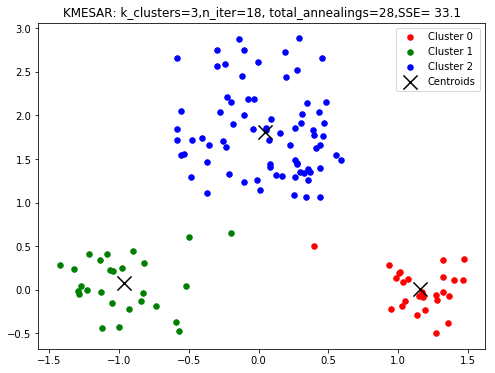

In [6]:
plt.figure(figsize=(8, 6))

colors = ['red', 'green', 'blue']
for cluster_label in range(est.k_clusters):
    cluster_subsample = df.loc[df['label'] == cluster_label]
    plt.scatter(cluster_subsample['x'], cluster_subsample['y'],
                c=colors[cluster_label], s=30, label=f'Cluster {cluster_label}')

plt.scatter(est.centroids_[:, 0], est.centroids_[:, 1], c='black', s=200, marker='x', label='Centroids')

plt.legend(loc='upper right')
plt.title(f'KMESAR: k_clusters={est.k_clusters},'
          f'n_iter={est.n_iter_}, '
          f'total_annealings={est.total_annealings_},'
          f'SSE={est.inertia_ : .3}')

KMESAR convergence tracking

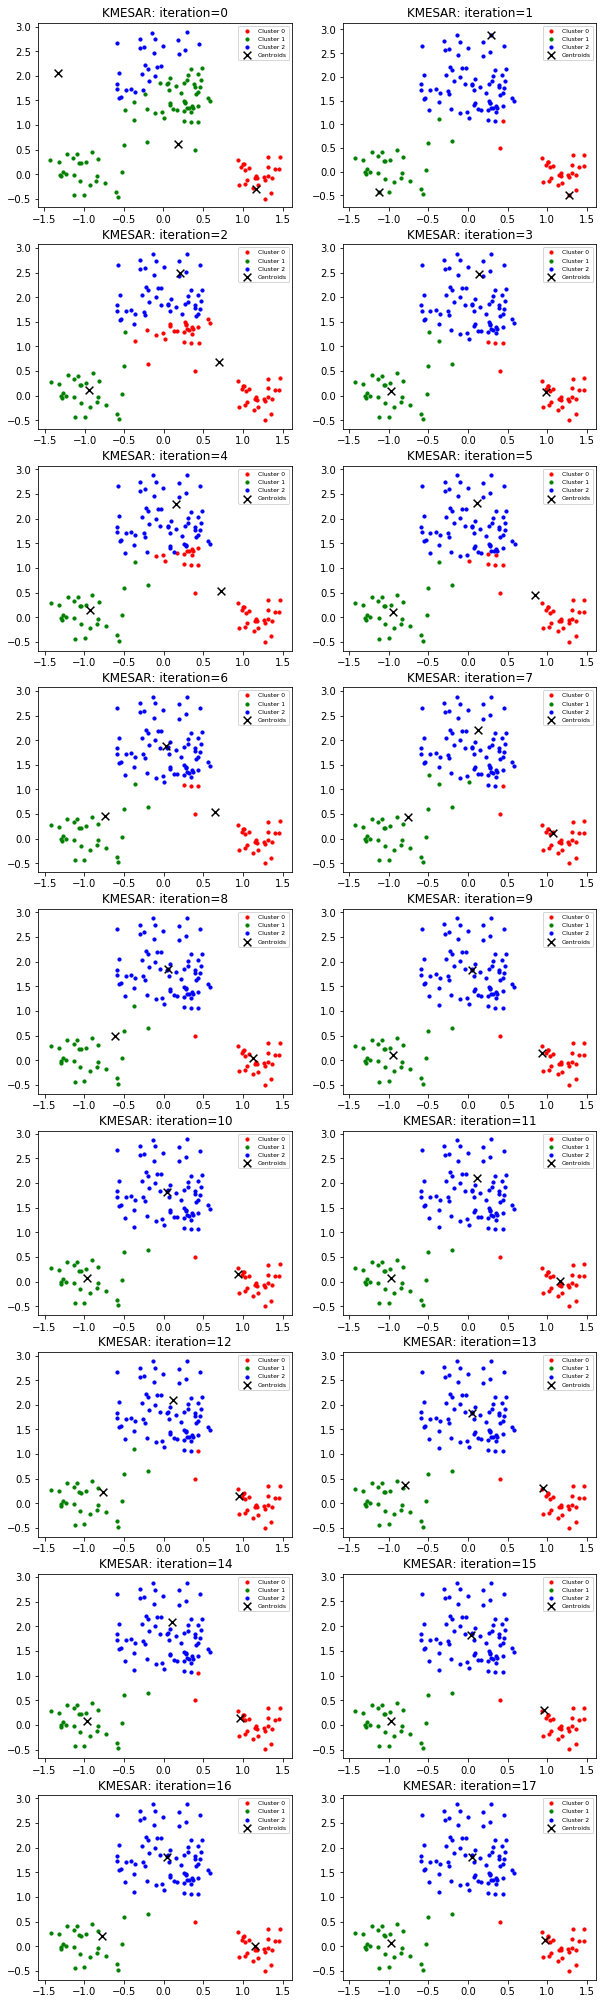

In [7]:
est.plot_tracking_history(points)

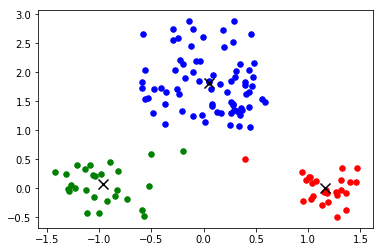

In [9]:
# print(est.tracking_history_[0]['centroids'][-1] == est.centroids_)
# print(est.tracking_history_[0]['labels'][-1] == est.labels_)

colors = ['red', 'green', 'blue']
for cluster_label in range(est.k_clusters):
    cluster_subsample = df.loc[df['label'] == cluster_label]
    plt.scatter(cluster_subsample['x'], cluster_subsample['y'], c=colors[cluster_label],
                s=30, label=f'Cluster {cluster_label}')

plt.scatter(est.tracking_history_[0]['centroids'][-1][:, 0],
            est.tracking_history_[0]['centroids'][-1][:, 1],
            c='black',
            s=100,
            marker='x'
            )